In [9]:
import os
import sys

In [10]:
sys.path.append('C:/Users/nitel/Desktop/Git/complex-frogs/cs3220_A6/cs3220_A6_part1/src')

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

In [12]:
from CSPclass import *
from utils import *

## **Task 1 -10 points**

Imagine that you need to create an exam schedule for the following courses:
1. Algorithms I
2. Introduction to File and Database Management
3. Practical Programming Methodology
4. Computer Organization and Architecture I
5. Linear Algebra I
6. Introduction to Applied Statistics I
7. Operating Systems

*Hint*: in the constraint satisfaction graph each node represents a course


Each course is associated with an initial domain of possible exam days:
1. Algorithms I *{Mon, Tue, Wed}*
2. Introduction to File and Database Management *{Tue}*
3. Practical Programming Methodology *{Mon, Tue, Wed}*
4. Computer Organization and Architecture I *{Mon, Tue, Wed}*
5. Linear Algebra I *{Mon, Tue, Wed}*
6. Introduction to Applied Statistics I *{Wed}*
7. Operating Systems *{Mon, Tue, Wed}*

Main restriction: 2 courses must have exams on different days.

1. Develop CSP implementation for this problem (based on CSP class) - *5 points*
2. Apply AC-3 for enforcing arc consistency on this entire problem and output the resulting domain for Practical Programming Methodology, Computer Organization and Architecture I, Linear Algebra I  - *5 points*

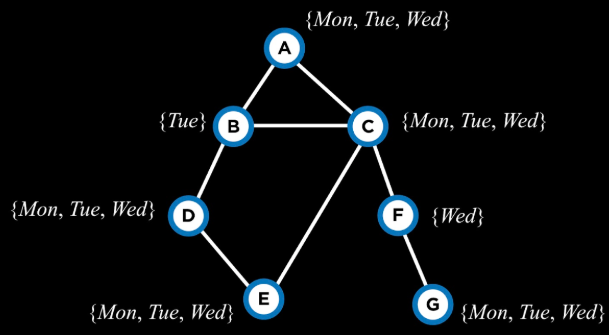

Where: 

    Algorithms I -A
    Introduction to File and Database Management -B
    Practical Programming Methodology C
    Computer Organization and Architecture I D
    Linear Algebra I E
    Introduction to Applied Statistics I F
    Operating Systems G


In [40]:
exams = "A: B C; B: C D; C: E F; D: E; F: G"

In [41]:
examneighbours = parse_neighbors(exams)

In [42]:
domains = {'A': ['Mon', 'Tue', 'Wed'], 'B': ['Tue'], 'C': ['Mon', 'Tue', 'Wed'], 'D': ['Mon', 'Tue', 'Wed'], 'E': ['Mon', 'Tue', 'Wed'], 'F': ['Wed'], 'G': ['Mon', 'Tue', 'Wed']}

In [47]:
constraints = lambda X, x, Y, y: x!=y

In [48]:
examCSP=CSPBasic(variables=None,neighbors=examneighbours, domains=domains, constraints=constraints)

In [49]:
from algorithms import AC3
AC3(examCSP)

Initial queue:
('A', 'B') ('A', 'C') 
('B', 'A') ('B', 'C') ('B', 'D') 
('C', 'A') ('C', 'B') ('C', 'E') ('C', 'F') 
('D', 'B') ('D', 'E') 
('E', 'C') ('E', 'D') 
('F', 'C') ('F', 'G') 
('G', 'F') 
Arc ('A', 'B') is cheking
The val Tue was deleted from A domain
[('A', 'C'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F', 'C'), ('F', 'G'), ('G', 'F'), ('C', 'A')]
Arc ('A', 'C') is cheking
[('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F', 'C'), ('F', 'G'), ('G', 'F'), ('C', 'A')]
Arc ('B', 'A') is cheking
[('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F', 'C'), ('F', 'G'), ('G', 'F'), ('C', 'A')]
Arc ('B', 'C') is cheking
[('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'E'), ('C', 'F'), ('D', 'B'), ('D', 'E'), ('E', 'C'), ('E', 'D'), ('F', 'C

(True, 53)

In [51]:
examCSP.curr_domains

{'A': ['Wed'],
 'B': ['Tue'],
 'C': ['Mon'],
 'D': ['Mon', 'Wed'],
 'E': ['Tue', 'Wed'],
 'F': ['Wed'],
 'G': ['Mon', 'Tue']}

In [52]:
letterToCourse = {
    'A': 'Algorithms',
    'B': 'Introduction to File and Database Management',
    'C': 'Practical Programming Methodology',
    'D': 'Computer Organization and Architecture',
    'E': 'Linear Algebra',
    'F': 'Introduction to Applied Statistics',
    'G': 'Operating Systems'
}

In [53]:
for courseKeys in letterToCourse:
    for examKeys in examCSP.curr_domains:
        if courseKeys == examKeys:
            print(letterToCourse[courseKeys], examCSP.curr_domains[examKeys])

Algorithms ['Wed']
Introduction to File and Database Management ['Tue']
Practical Programming Methodology ['Mon']
Computer Organization and Architecture ['Mon', 'Wed']
Linear Algebra ['Tue', 'Wed']
Introduction to Applied Statistics ['Wed']
Operating Systems ['Mon', 'Tue']


In [54]:
for courseKeys in letterToCourse:
    for examKeys in examCSP.curr_domains:
        if courseKeys == examKeys:
            if courseKeys == 'C' or courseKeys == 'D' or courseKeys == 'E':
                print(letterToCourse[courseKeys], examCSP.curr_domains[examKeys])

Practical Programming Methodology ['Mon']
Computer Organization and Architecture ['Mon', 'Wed']
Linear Algebra ['Tue', 'Wed']


## **Task 2 - 10 points**

Modify (enhance) the given code version to make AC-3 applicable for such constraints as the following examples:

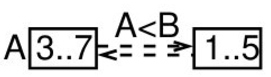

 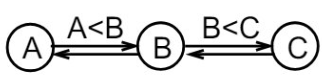